In [ ]:
import pandas as pd
from scipy import stats

In [ ]:
road_df = pd.read_csv("Road_final.csv")
ambulance_df = pd.read_csv("Ambulance_final.csv")

In [ ]:
road_df.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,label
0,road324.wav,0.442203,0.022001,2545.346793,2426.479510,4754.282790,0.155189,-270.384613,100.619019,-10.223790,...,17.983824,-11.696289,18.793995,-5.305555,-0.965415,5.482495,-10.139045,-2.003446,3.736357,Road
1,road508.wav,0.337758,0.206505,3470.430019,2706.420324,6899.114051,0.181979,11.297463,41.953815,-35.142498,...,13.245173,-2.812768,-0.847138,-7.962325,-2.489496,-5.065870,15.039159,-7.175189,2.037403,Road
2,road351.wav,0.440022,0.173755,1248.230706,1904.995271,2556.032621,0.020921,-134.684311,138.695663,-9.734646,...,12.647631,2.210467,9.100524,3.403701,8.452733,1.088790,4.929297,-0.253739,4.125893,Road
3,road703.wav,0.600494,0.040601,1075.899022,1827.481394,1814.793513,0.032874,-252.906036,157.615418,9.920370,...,9.185198,-4.017237,1.136444,-3.741317,3.954798,-0.935155,8.923501,3.227440,6.275182,Road
4,road681.wav,0.631075,0.065356,742.548260,1372.708521,1231.119479,0.023869,-257.946930,187.372162,7.777202,...,13.000937,2.262908,7.443036,-0.647730,2.444229,-2.062293,6.974404,1.464423,2.268083,Road


In [ ]:
ambulance_df.head()

,filename,chroma_stft,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,mfcc21,label
0,ambulance142.wav,0.345168,0.308853,1287.145377,1261.699532,2379.211895,0.081083,-74.003632,163.974853,-72.760811,...,9.624608,-3.336412,-2.421668,-2.059879,9.900706,6.835095,2.545403,-4.973841,4.305125,Ambulance
1,ambulance449.wav,0.386696,0.263407,2223.479605,2115.848084,4718.463135,0.122690,10.772755,101.783501,-41.391842,...,18.845276,2.768121,-5.581450,-8.168453,1.215980,-9.383577,1.723579,0.454906,9.782359,Ambulance
2,ambulance888.wav,0.517708,0.281876,1393.990435,1586.770873,2898.286321,0.064444,-52.157757,144.876480,-45.382484,...,2.125229,-7.980848,7.127768,2.115508,1.014645,-0.404026,3.214492,-5.129189,0.641621,Ambulance
3,ambulance474.wav,0.229988,0.184972,2211.761868,1923.778124,3913.245568,0.116267,-130.663757,88.106293,-45.787319,...,0.629086,1.551030,24.814060,10.781730,-1.599966,-20.135389,-10.052261,-3.237577,11.093946,Ambulance
4,ambulance305.wav,0.149670,0.115018,1266.959915,1654.095586,1831.978666,0.094191,-213.125717,138.419174,-6.672751,...,0.796616,1.224933,9.291833,4.321001,5.267659,-1.062411,-0.764217,-4.817847,0.678133,Ambulance


In [ ]:
import pandas as pd
from scipy import stats

features = [
    "chroma_stft", "spectral_centroid", "spectral_bandwidth", "rolloff", "zero_crossing_rate",
    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8", "mfcc9", "mfcc10",
    "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16", "mfcc17", "mfcc18", "mfcc19", "mfcc20", "mfcc21"
]

mean_road_df = road_df.drop(columns=['filename', 'label']).mean()
median_road_df = road_df.drop(columns=['filename', 'label']).median()

mean_ambulance_df = ambulance_df.drop(columns=['filename', 'label']).mean()
median_ambulance_df = ambulance_df.drop(columns=['filename', 'label']).median()

sd_road_df = road_df.drop(columns=['filename', 'label']).std()
sd_ambulance_df = ambulance_df.drop(columns=['filename', 'label']).std()

# Combine the means and medians into one DataFrame
stats_df = pd.DataFrame({
    'Road Noise Mean': mean_road_df,
    'Road Noise Median': median_road_df,
    'Road Noise SD': sd_road_df,
    'Ambulance Mean': mean_ambulance_df,
    'Ambulance Median': median_ambulance_df,
    "Ambulance SD":sd_ambulance_df
})
stats_df

,Road Noise Mean,Road Noise Median,Road Noise SD,Ambulance Mean,Ambulance Median,Ambulance SD
chroma_stft,0.586300,0.611355,0.108029,0.259863,0.235615,0.120383
spectral_centroid,0.081954,0.058106,0.073826,0.208195,0.180524,0.119971
spectral_bandwidth,1697.755508,1608.564447,687.226123,1607.568013,1503.529794,452.140817
rolloff,1953.036013,1907.505842,402.485881,1540.172965,1496.589087,370.515083
zero_crossing_rate,3256.896196,3043.467214,1450.059128,2716.821484,2594.543927,978.829730
mfcc1,0.080014,0.065439,0.054809,0.098112,0.095140,0.030102
mfcc2,-187.145719,-185.683166,116.372581,-170.731687,-154.641312,105.246113
mfcc3,128.833473,132.707260,37.212170,120.069369,129.253891,36.012466
mfcc4,-20.623280,-16.606279,26.518949,-43.309776,-43.209394,25.472043
mfcc5,12.519564,11.322944,12.734962,5.320110,1.964972,28.299817


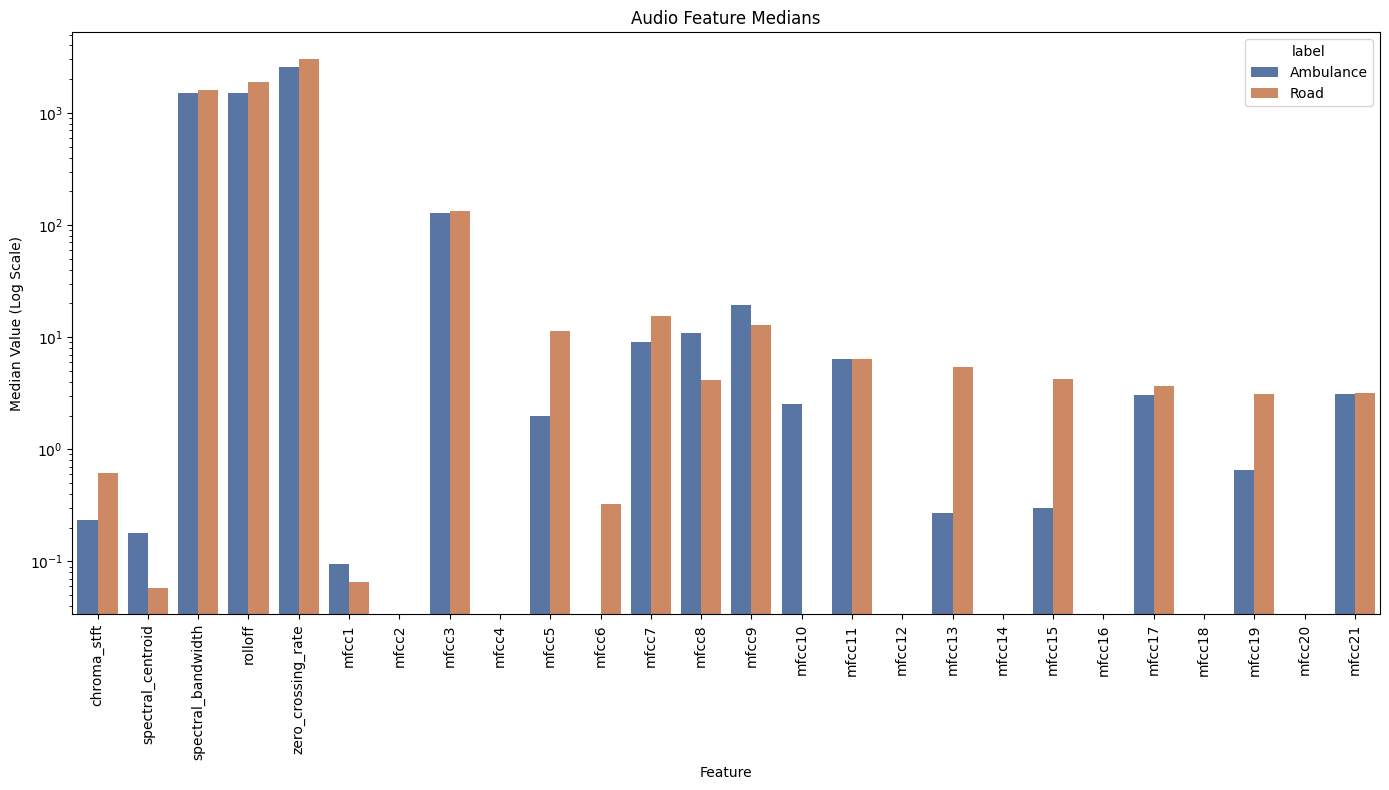

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_palette("deep")

df = pd.concat([road_df, ambulance_df])
df_numeric = df.drop(columns=['filename'])

columns_to_plot = [col for col in df_numeric.columns if col != 'label']
medians = df[columns_to_plot + ['label']].groupby('label').median().reset_index()

# Need to melt to graph correctly
medians_melted = medians.melt(id_vars='label', var_name='feature', value_name='median_value')

plt.figure(figsize=(14, 8))
sns.barplot(x='feature', y='median_value', hue='label', data=medians_melted, estimator=np.median, hue_order=["Ambulance", "Road"])
plt.yscale('log')
plt.title('Audio Feature Medians')
plt.xlabel('Feature')
plt.ylabel('Median Value (Log Scale)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# https://seaborn.pydata.org/generated/seaborn.barplot.html
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html


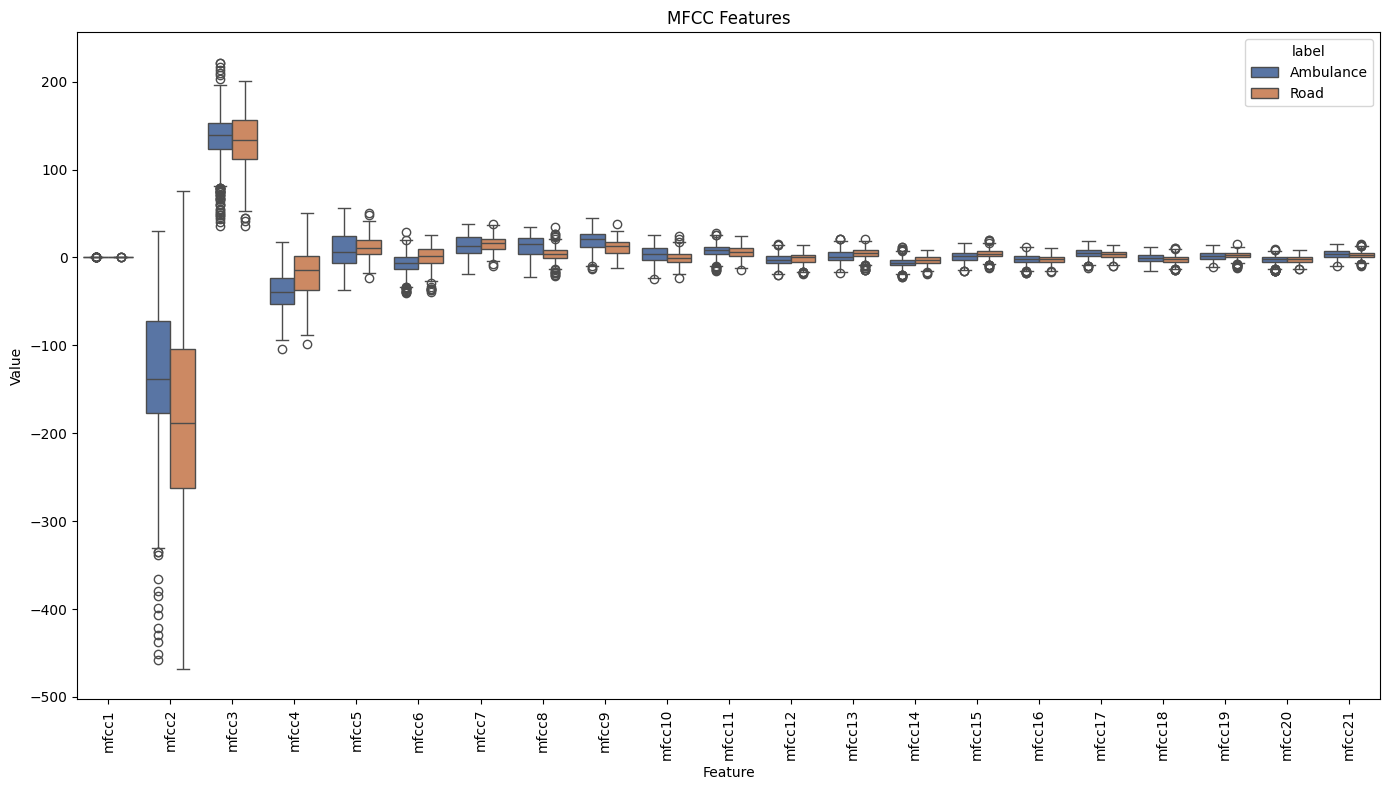

In [ ]:
mfcc_columns = [f'mfcc{i}' for i in range(1, 22)]

df_mfcc = df[['label'] + mfcc_columns].copy()
df_mfcc[mfcc_columns] = df_mfcc[mfcc_columns].apply(pd.to_numeric, errors='coerce')

Q1 = df_mfcc[mfcc_columns].quantile(0.25)
Q3 = df_mfcc[mfcc_columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers using IQR method
df_mfcc = df_mfcc[~((df_mfcc[mfcc_columns] < (Q1 - 1.5 * IQR)) | (df_mfcc[mfcc_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

df_mfcc_melted = df_mfcc.melt(id_vars='label', var_name='feature', value_name='value')

plt.figure(figsize=(14, 8))
sns.boxplot(x='feature', y='value', hue='label', data=df_mfcc_melted, hue_order=["Ambulance", "Road"])
plt.title('MFCC Features')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
# https://stackoverflow.com/questions/35827863/remove-outliers-in-pandas-dataframe-using-percentiles
# https://stackoverflow.com/questions/40095712/when-to-applypd-to-numeric-and-when-to-astypenp-float64-in-python
# https://pandas.pydata.org/docs/reference/api/pandas.melt.html